In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import math

import plotly.express as px

import pandas_datareader.data as web

from keras.callbacks import EarlyStopping

import keras
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import mean_squared_error

In [63]:
from datetime import date
today = date.today()
def multiple_stock_data(ticker=None, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            plt.title("Stock Adjusted Price Historical Data")
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


In [64]:
# multi_stock_data = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=True, stock_value='Adj Close')
# multi_stock_data;

In [65]:
#multi_stock_data.to_csv('multi_pharm_data')

In [66]:
multi_stocks = pd.read_csv('multi_pharm_data', parse_dates=True, index_col='Date')
multi_stocks

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,104.081535,25.400000,NaN,23.886580,NaN
2017-01-04,26.887548,103.910828,26.200001,NaN,24.076221,NaN
2017-01-05,27.146002,104.998009,26.400000,NaN,24.731359,NaN
2017-01-06,27.041008,104.494850,27.400000,NaN,24.507233,NaN
2017-01-09,27.032928,104.476868,28.400000,NaN,24.593435,NaN
...,...,...,...,...,...,...
2021-02-08,34.820000,164.919998,319.929993,185.979996,50.060001,119.500000
2021-02-09,34.970001,166.270004,315.869995,179.520004,50.410000,117.529999
2021-02-10,34.740002,166.809998,298.359985,179.339996,49.970001,119.349998


In [67]:
def get_plot(df, stock_value=None):
    #plt.figure(figsize=(12,8))
    df.plot(figsize=(12,8))
    label_font = {'weight':'bold','size':18}
    plt.xlabel('Date',fontdict=label_font)
    plt.ylabel('Close Price USD ($)',fontdict=label_font)
    plt.title(f'Historical {stock_value} Price',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
    return df
    

In [68]:
def single_stock_data(symbol, start,end=None,plot=True,stock_value='Adj Close'):
    
    try:
        
        df = web.DataReader(symbol,'yahoo', start, end)
        df_single = pd.DataFrame(df)
        print("Dataframe has {} rows and {} columns".format(df_single.shape[0],df_single.shape[1]))
        print()
        if plot==True:
            plt.figure(figsize=(12,8))
            plt.plot(df_single[stock_value])
            label_font = {'weight':'bold','size':18}
            plt.xlabel('Date',fontdict=label_font)
            plt.ylabel('Close Price USD ($)',fontdict=label_font)
            plt.title(f'Historical {stock_value} Price for {symbol}',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
        return df_single

    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


## Technical Indicators
What are technical indicators and how are they relevant to stock trading?  Technical indicators are heuristic or pattern-based signals produced by the price, volume, and/or open interest of a stock which are used by traders who follow technical analysis. https://www.investopedia.com/terms/t/technicalindicator.asp<br>In otherwords, by analyzing historical data, analysts can use indicators to predict future price movements and decide when to enter and exit markets.<br>
I will discuss popular technical indicators that are used in the markets to study price movements:

1. Moving Average (MA)
2. Ease of Movement (EVM)
3. Rate of Change (ROC)

### Simple Daily Return

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,104.081535,25.400000,NaN,23.886580,NaN
2017-01-04,26.887548,103.910828,26.200001,NaN,24.076221,NaN
2017-01-05,27.146002,104.998009,26.400000,NaN,24.731359,NaN
2017-01-06,27.041008,104.494850,27.400000,NaN,24.507233,NaN
2017-01-09,27.032928,104.476868,28.400000,NaN,24.593435,NaN
...,...,...,...,...,...,...
2021-02-08,34.820000,164.919998,319.929993,185.979996,50.060001,119.500000
2021-02-09,34.970001,166.270004,315.869995,179.520004,50.410000,117.529999
2021-02-10,34.740002,166.809998,298.359985,179.339996,49.970001,119.349998


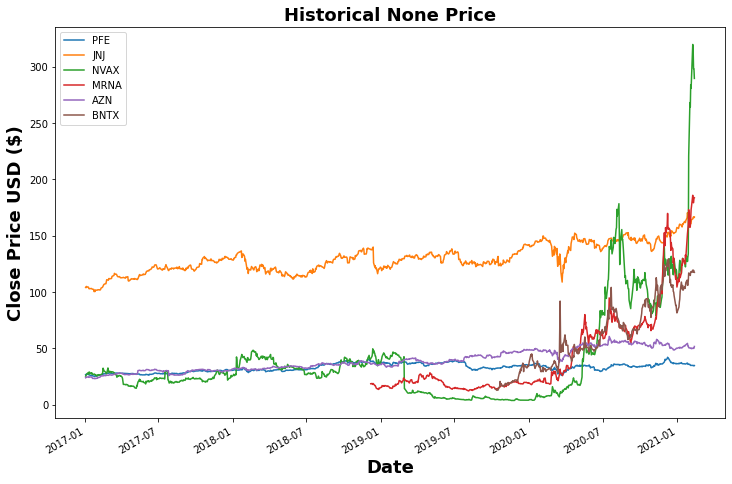

In [69]:
# sdr = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=False, stock_value='Adj Close')
# sdr
df = get_plot(multi_stocks)
df

In [70]:

sdr = multi_stocks.pct_change(1)
sdr

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008788,-0.001640,0.031496,NaN,0.007939,NaN
2017-01-05,0.009612,0.010463,0.007634,NaN,0.027211,NaN
2017-01-06,-0.003868,-0.004792,0.037879,NaN,-0.009062,NaN
2017-01-09,-0.000299,-0.000172,0.036496,NaN,0.003517,NaN
...,...,...,...,...,...,...
2021-02-08,-0.002864,0.002858,0.102523,0.055265,0.006636,0.016416
2021-02-09,0.004308,0.008186,-0.012690,-0.034735,0.006992,-0.016485
2021-02-10,-0.006577,0.003248,-0.055434,-0.001003,-0.008728,0.015485


In [71]:
(26.887548/26.653324) - 1

0.008787796974216056

In [72]:
# #visualize stocks daily returns
# plt.figure(figsize=(12,6))
# #loop through each stock and plot simple returns
# for c in d_simple_returns.columns.values:
#     plt.plot(d_simple_returns.index, d_simple_returns[c], label=c)
# #plt.title(title)
# #plt.ylabel(col + ' Price', fontsize=18)
# plt.legend(loc='upper left', fontsize=10)
# plt.title('Volatility')
# plt.xlabel('Date')
# plt.ylabel('Daily Simple Returns')

### Average Daily Return

In [73]:
# d_simple_returns.std()
# mean_return = d_simple_returns.mean()
# print('The Daily Mean Simple Return')
# mean_return

## Forecasting
### Long Short Term Memory (LSTM)

In [74]:
#start='01-01-2019',end='today',
#df_single = single_stock_data('PFE', start='01-01-2019',end='today',plot=True,stock_value='Adj Close')

In [75]:
#df_single.to_csv('single_stock')
single_stock = pd.read_csv('single_stock', parse_dates=True, index_col='Date')
single_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,41.271347,40.455406,40.910816,41.034157,26430315.0,37.603287
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781
...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002


In [76]:
(24.905140 / 25.028662) -1

-0.00493522186683415

In [77]:
def delta_time_series(data,col=None):
    data['Percent_Chg'] = data[col].pct_change(1)
    #data_1 = data_1.rename(columns={"Adj Close": "Percent_Chg"})
    #return data[1:]- data[:-1]
    data = data.dropna()
    return data

In [78]:
df_chnge = delta_time_series(single_stock, col='Adj Close')
df_chnge

,High,Low,Open,Close,Volume,Adj Close,Percent_Chg
Date,,,,,,,
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-0.027977
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.022835
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.005349
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.004626
2019-01-09,41.432636,40.986717,41.233398,41.119545,20107580.0,37.681534,-0.002072
...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.002864
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.004308
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.006577


In [79]:
df_chnge.shape

(533, 7)

In [80]:
def plot_delta(data,col=None,symbol=None):
    plt.figure(figsize=(12,6))
    #plt.plot(delta_time_series(data))
    plt.plot(data[col])
    label_font = {'weight':'bold','size':18}
    plt.title('Daily Percentage Price Change',fontdict=label_font)
    plt.xlabel('Dates',fontdict=label_font)
    plt.ylabel('close')
    plt.show()

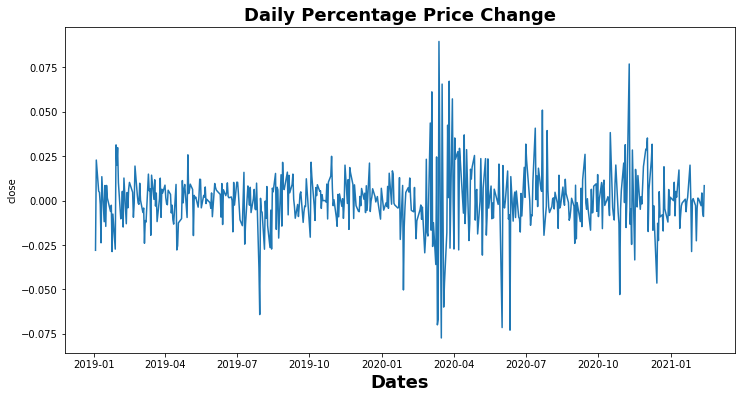

In [81]:
#simple daily return
#centered aroun d 0
plot_delta(df_chnge, col='Percent_Chg')

In [82]:
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [83]:
def binary_accuracy(a, b):
    '''
    Helper function to compute the match score of two 
    binary numpy arrays.
    '''
    assert len(a) == len(b)
    return (a == b).sum() / len(a)

In [84]:
df_chnge

,High,Low,Open,Close,Volume,Adj Close,Percent_Chg
Date,,,,,,,
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-0.027977
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.022835
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.005349
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.004626
2019-01-09,41.432636,40.986717,41.233398,41.119545,20107580.0,37.681534,-0.002072
...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.002864
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.004308
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.006577


In [85]:
single_stock = df_chnge.copy()

In [86]:
single_stock

,High,Low,Open,Close,Volume,Adj Close,Percent_Chg
Date,,,,,,,
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-0.027977
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.022835
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.005349
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.004626
2019-01-09,41.432636,40.986717,41.233398,41.119545,20107580.0,37.681534,-0.002072
...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.002864
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.004308
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.006577


In [87]:
train_size = int(len(single_stock) * 0.80)#0.67
test_size = len(single_stock) - train_size
#val_size = len(dataset_delta_AMAZN)  - 

In [88]:
single_stock.index[train_size]

Timestamp('2020-09-11 00:00:00')

In [89]:
single_stock.index[-test_size]


Timestamp('2020-09-11 00:00:00')

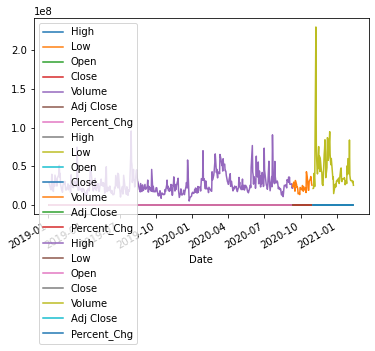

In [90]:
train = single_stock[:'2020-09-11']
val = single_stock['2020-09-11':'2020-11-01']
test = single_stock['2020-11-01':] #2021-02-12
ax = train.plot()
val.plot(ax=ax)
test.plot(ax=ax)

In [91]:
def train_test_val(single_stock, date1='2020-09-11', date2='2020-11-01'):    
    train = single_stock[:date1]#'2020-09-11'
    val = single_stock[date1:date2]
    test = single_stock[date2:] #2021-02-12
    ax = train.plot()
    val.plot(ax=ax)
    test.plot(ax=ax)
    
    return train, val, test

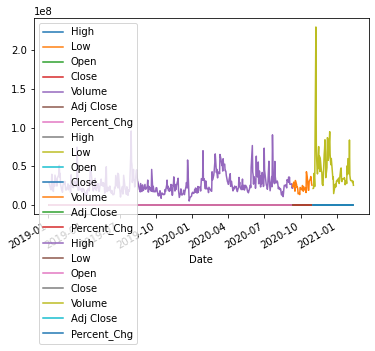

In [92]:
train, val, test= train_test_val(single_stock)

In [93]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
val_scaled = scaler.transform(val)

In [94]:
train_scaled.shape, val_scaled.shape, test_scaled.shape

((427, 7), (36, 7), (71, 7))

In [95]:
look_back = 10
batch_size=3
col_index = {v:k for k,v in enumerate(train.columns)}
col_index

{'High': 0,
 'Low': 1,
 'Open': 2,
 'Close': 3,
 'Volume': 4,
 'Adj Close': 5,
 'Percent_Chg': 6}

In [96]:
col_index['Adj Close']


5

In [97]:
train_data_gen = TimeseriesGenerator(train_scaled, train_scaled[:,col_index['Adj Close']],
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=batch_size)

In [98]:
val_data_gen = TimeseriesGenerator(val_scaled, val_scaled[:,col_index['Adj Close']],
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=batch_size)

In [99]:
test_data_gen = TimeseriesGenerator(test_scaled, test_scaled[:,col_index['Adj Close']],
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [100]:
ex_X, ex_y = train_data_gen[0]
ex_X.shape

(3, 10, 7)

In [101]:
sample = ex_X[0]
sample.shape

(10, 7)

In [102]:
# model = Sequential()
# model.add(LSTM(4, input_shape=(look_back, 1)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 50)            11600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)               

In [103]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
# hist = model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop],validation_split=0.1)     
hist = model.fit_generator(train_data_gen, epochs=50,validation_data=val_data_gen,callbacks=[early_stop])

Epoch 1/50
139/139 [==============================] - 2s 14ms/step - loss: 0.0388 - val_loss: 0.0326
Epoch 2/50
139/139 [==============================] - 2s 15ms/step - loss: 0.0180 - val_loss: 0.0038
Epoch 3/50
139/139 [==============================] - 2s 17ms/step - loss: 0.0132 - val_loss: 0.0108
Epoch 4/50
139/139 [==============================] - 3s 19ms/step - loss: 0.0139 - val_loss: 0.0089
Epoch 5/50
139/139 [==============================] - 2s 15ms/step - loss: 0.0115 - val_loss: 0.0121


In [104]:
model.evaluate_generator(test_data_gen)

0.009831251576542854

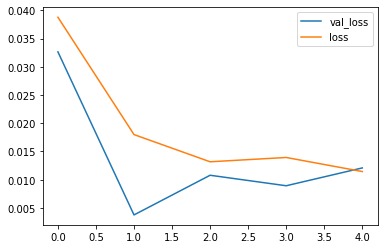

In [105]:
pd.DataFrame(hist.history).plot()

In [106]:
def save_model():
    model.save('model_parameters')
    model_params = keras.models.load_model('model_parameters')
    model_params.summary()

    return model_params

In [107]:
model_params = save_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 50)            11600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)               

In [108]:
trainPredict = model.predict_generator(train_data_gen)
trainPredict.shape

(417, 1)

In [109]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(61, 1)

In [110]:
scaler

MinMaxScaler()

In [111]:
# def invTransform(scaler, data, colName, colNames):
#     dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
#     dummy[colName] = data
#     dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
#     return dummy[colName].values

In [112]:
# invTransform(scaler, data=df, colNames=df.columns)

In [113]:
# invert predictions, scale values back to real index/price range.
# trainPredict = scaler.inverse_transform(trainPredict)
# testPredict = scaler.inverse_transform(testPredict)

In [114]:
trainY = get_y_from_generator(train_data_gen)
testY = get_y_from_generator(test_data_gen)

(417, 1)
(61, 1)


In [115]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.09 RMSE
Test Score: 0.20 RMSE


In [116]:
# dataset = scaler.inverse_transform(df) #dataset
# dataset.shape

In [117]:
# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # Delta + previous close
# trainPredictPlot = trainPredictPlot + df_data[1:]
# set empty values
# trainPredictPlot[0:look_back, :] = np.nan
# trainPredictPlot[len(trainPredict)+look_back:, :] = np.nan

# shift train predictions for plotting
trainPredictPlot = np.empty_like(single_stock) #df
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# Delta + previous close
trainPredictPlot = trainPredictPlot + single_stock #[1:] #df

In [124]:
testPredictPlot = np.empty_like(single_stock)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(single_stock), :] = testPredict

# Delta + previous close
testPredictPlot = testPredictPlot + single_stock[1:]
# set empty values
# testPredictPlot[0:len(trainPredict)+(look_back*2), :] = np.nan
# testPredictPlot[len(dataset):, :] = np.nan

ValueError: could not broadcast input array from shape (61,1) into shape (96,7)

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(dataset + df_data[1:])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Valid','Train','Predictions'],loc='upper left')
#plt.show()


In [ ]:
# plot baseline and predictions
plt.plot(dataset + df_data[:-1])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [119]:
def get_quote(new_df):
    #get last 60days closing values and convert datframe to an array
    last_60_days = new_df[-60:].values #converts to array
    #scale data
    last_60_days_scaled = scaler.transform(last_60_days)
    #create empty list
    x_test = []
    #append last 60 days to x_test
    x_test.append(last_60_days_scaled)
    #conert x_test to a numpy array
    x_test = np.array(x_test)
    # #reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    pred_price = model.predict(x_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price) 
    #what model thinks predicted price will be for 12/18/2019
    #the actual prcie was $69.94
    #DAL: 58.58, 2021-1-11 40.19
    return pred_price    

In [123]:
#get_quote(single_stock[['Adj Close']])

### Multi-Series Forecasting

In [ ]:
df_multi = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN']], start='12-31-2018',end='today',plot=True, stock_value='Adj Close');
df_multi #;

In [ ]:
len(df_multi), len(dataset_delta_AMAZN)

In [ ]:
dataset_x = delta_time_series(df_multi)
dataset_x 

In [ ]:
dataset_y= delta_time_series(dataset_delta_AMAZN)
dataset_y 

In [ ]:
# normalize the dataset
scaler_multi = MinMaxScaler(feature_range=(0, 1))
scaler_multi.fit_transform(dataset_x.reshape(-1, 1))
dataset_x = scaler_multi.transform(dataset_x)
dataset_y = scaler_multi.transform(dataset_y)
# split into train and test sets
train_size = int(len(dataset_x) * 0.67)
test_size = len(dataset_x) - train_size
train_x, test_x = dataset_x[0:train_size,:], dataset_x[train_size:len(dataset_x),:]
train_y, test_y = dataset_y[0:train_size,:], dataset_y[train_size:len(dataset_y),:]

In [ ]:
train_x.shape,train_y.shape, test_x.shape, test_y.shape

In [ ]:
train_data_gen = TimeseriesGenerator(train_x, train_y,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [ ]:
test_data_gen = TimeseriesGenerator(test_x, test_y,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=1)